In [1]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

Mounted at /content/drive


In [2]:
# 2. Đọc file csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject_BA/NVL Historical Data.csv')

In [3]:
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df.Price.astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df=df[::-1]
df1=df.reset_index()['Price']

In [4]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(len(df1)) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [6]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [9]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 7s 92ms/step - loss: 0.0401 - val_loss: 0.0134
Epoch 2/100
21/21 [==============================] - 1s 60ms/step - loss: 0.0045 - val_loss: 0.0033
Epoch 3/100
21/21 [==============================] - 1s 60ms/step - loss: 9.3088e-04 - val_loss: 2.1800e-05
Epoch 4/100
21/21 [==============================] - 1s 51ms/step - loss: 4.6121e-04 - val_loss: 3.1882e-05
Epoch 5/100
21/21 [==============================] - 1s 51ms/step - loss: 4.0688e-04 - val_loss: 1.7978e-05
Epoch 6/100
21/21 [==============================] - 1s 51ms/step - loss: 3.8693e-04 - val_loss: 2.3955e-05
Epoch 7/100
21/21 [==============================] - 2s 88ms/step - loss: 3.7184e-04 - val_loss: 2.5759e-05
Epoch 8/100
21/21 [==============================] - 2s 98ms/step - loss: 3.6152e-04 - val_loss: 2.1982e-05
Epoch 9/100
21/21 [==============================] - 2s 90ms/step - loss: 3.5130e-04 - val_loss: 2.2287e-05
Epoch 10/100
21/21 [========================

In [11]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 13ms/step


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [13]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 16687.10969401507


In [14]:
x_input = test_data[len(test_data)-time_step:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)


[[0.0807889923453331], [0.08002132177352905], [0.07901204377412796], [0.0778813287615776], [0.07667072862386703], [0.07539829611778259], [0.07407382130622864], [0.07270457595586777], [0.07129660248756409], [0.06985515356063843], [0.06838468462228775], [0.06688904017210007], [0.06537153571844101], [0.06383499503135681], [0.062281858175992966], [0.06071426719427109], [0.05913402885198593], [0.057542748749256134], [0.05594181269407272], [0.05433240532875061], [0.05271555483341217], [0.051092199981212616], [0.04946308955550194], [0.04782893881201744], [0.046190325170755386], [0.044547755271196365], [0.042901668697595596], [0.041252460330724716], [0.03960046172142029], [0.037945959717035294], [0.03628920391201973], [0.03463040292263031], [0.03296973928809166], [0.03130738064646721], [0.029643453657627106], [0.0279780775308609], [0.0263113584369421], [0.024643369019031525], [0.022974183782935143], [0.02130386419594288], [0.01963246613740921], [0.017960024997591972], [0.016286585479974747], [

ValueError: x and y must have same first dimension, but have shapes (0,) and (55, 1)

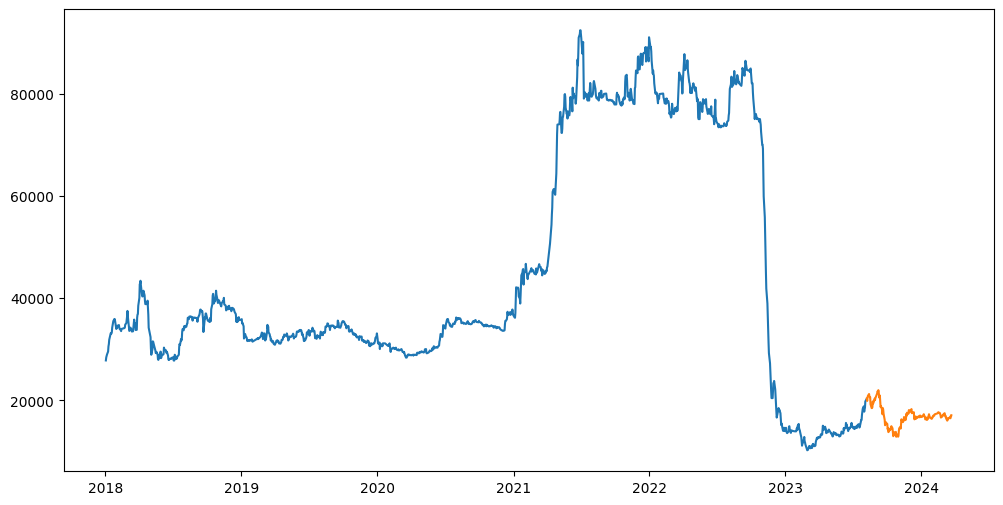

In [15]:
plt.figure(figsize=(12,6))

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot train data
train_dates = df['Date'][:train_size]
plt.plot(train_dates, scaler.inverse_transform(train_data), label='Train')

# Plot test data
test_dates = df['Date'][train_size:train_size + test_size]
plt.plot(test_dates, scaler.inverse_transform(test_data), label='Test')

# Plot predictions for test data
test_predict_dates = df['Date'][train_size + time_step:train_size + len(y_pred)]
plt.plot(test_predict_dates, y_pred, label='Predicted Test')

# Predict next 30 days
last_date = df['Date'].iloc[-1]
predict_30_days_dates = pd.date_range(start=last_date, periods=90)
plt.plot(predict_30_days_dates, scaler.inverse_transform(lst_output), label='Predicted 90 Days')

# Formatting the plot
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Prediction')
plt.xticks(rotation=45)
plt.show()
